In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [48]:
df=pd.read_csv('tested.csv')
print("Train Dataset shape: ",df.shape)

Train Dataset shape:  (418, 12)


In [49]:
X=df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y= df["Survived"]
print("X Dataset shape: ",X.shape)
print("y Dataset shape: ",y.shape)

X Dataset shape:  (418, 8)
y Dataset shape:  (418,)


In [50]:
X.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [51]:
num_vars=X.select_dtypes(['int64','float64']).columns
num_vars

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [52]:
cat_vars=X.select_dtypes(['O']).columns
cat_vars

Index(['Sex', 'Embarked'], dtype='object')

In [53]:
imputermean=SimpleImputer(strategy='mean')
imputermean.fit(X[num_vars])
imputermode=SimpleImputer(strategy='most_frequent')
imputermode.fit(X[cat_vars])

SimpleImputer(strategy='most_frequent')

In [54]:
X[num_vars]=imputermean.transform(X[num_vars])
X[num_vars].isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [55]:
X[cat_vars]=imputermode.transform(X[cat_vars])
X[cat_vars].isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [56]:
X.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [57]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892.0,3.0,34.50000,0.0,0.0,7.8292,1,1,0
1,893.0,3.0,47.00000,1.0,0.0,7.0000,0,0,1
2,894.0,2.0,62.00000,0.0,0.0,9.6875,1,1,0
3,895.0,3.0,27.00000,0.0,0.0,8.6625,1,0,1
4,896.0,3.0,22.00000,1.0,1.0,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,30.27259,0.0,0.0,8.0500,1,0,1
414,1306.0,1.0,39.00000,0.0,0.0,108.9000,0,0,0
415,1307.0,3.0,38.50000,0.0,0.0,7.2500,1,0,1
416,1308.0,3.0,30.27259,0.0,0.0,8.0500,1,0,1


In [65]:
# Build and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Train Dataset shape:  (418, 12)


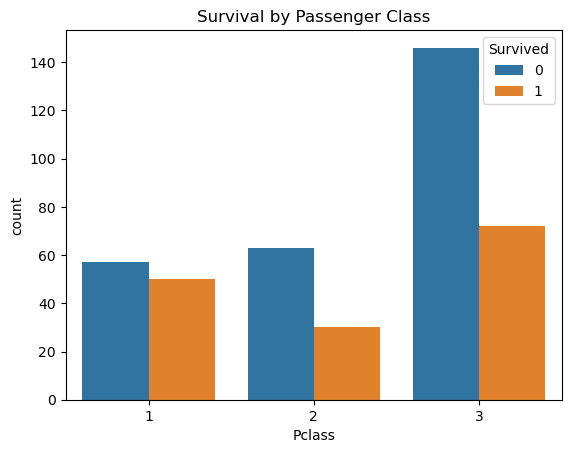

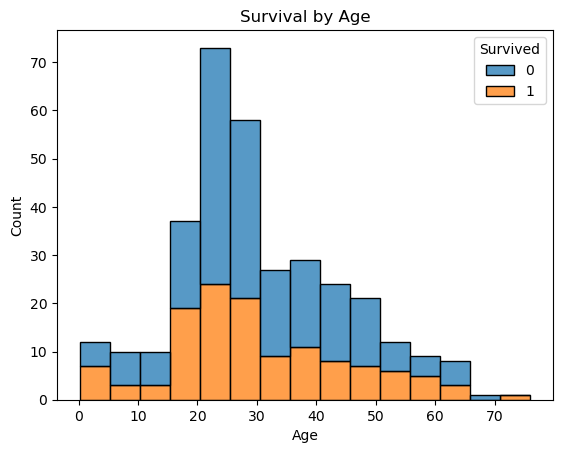

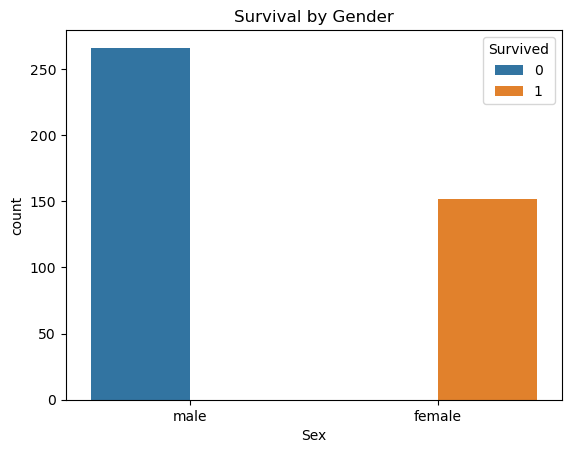

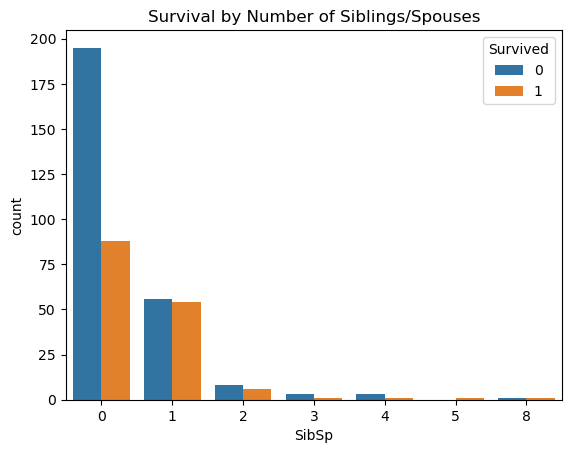

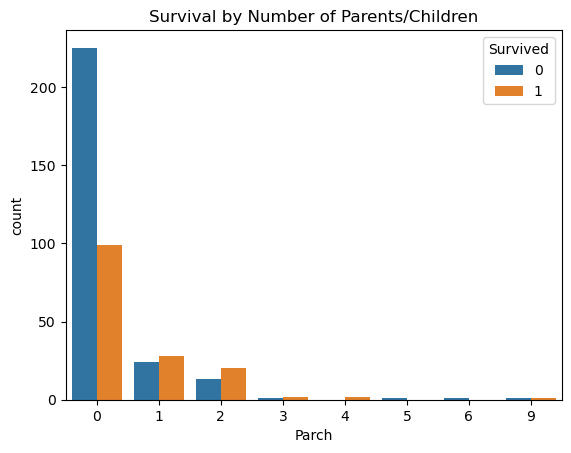

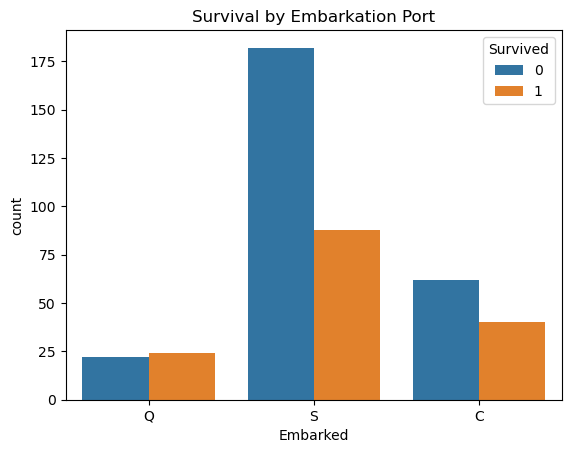

In [72]:
data=pd.read_csv('tested.csv')
print("Train Dataset shape: ",data.shape)
# Visualize survival based on passenger class
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

# Visualize survival based on age
sns.histplot(x='Age', hue='Survived', data=data, multiple='stack')
plt.title('Survival by Age')
plt.show()

# Visualize survival based on gender
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()

# Visualize survival based on number of siblings/spouses
sns.countplot(x='SibSp', hue='Survived', data=data)
plt.title('Survival by Number of Siblings/Spouses')
plt.show()

# Visualize survival based on number of parents/children
sns.countplot(x='Parch', hue='Survived', data=data)
plt.title('Survival by Number of Parents/Children')
plt.show()

# Visualize survival based on embarkation port
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival by Embarkation Port')
plt.show()